# Churn Modeling

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

Here we have 13 feature columns and **Exited** is a target column.

**Row Numbers:-**
Row Numbers from 1 to 10000.


**CustomerId:-**
Unique Ids for bank customer identification.

**Surname:-**
Customer's last name.

**CreditScore:-**
Credit score of the customer.

**Geography:-**
The country from which the customer belongs(Germany/France/Spain).

**Gender:-**
Male or Female(Female/Male).

**Age:-**
Age of the customer.

**Tenure:-**
Number of years for which the customer has been with the bank.

**Balance:-**
Bank balance of the customer.

**NumOfProducts:-**
Number of bank products the customer is utilising.

**HasCrCard:-**
Binary Flag for whether the customer holds a credit card with the bank or not(0=No,1=Yes).

**IsActiveMember:-**
Binary Flag for whether the customer is an active member with the bank or not(0=No,1=Yes).

**EstimatedSalary:-**
Estimated salary of the customer in Dollars.

**Exited:-**
Binary flag 1 if the customer closed account with bank and 0 if the customer is retained(0=No,1=Yes).

# 1. Import Liberary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Exploratory Data Analysis

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(10000, 14)

We don't have duplicate values.

In [8]:
Catagorical_Features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

**1. CreditScore**

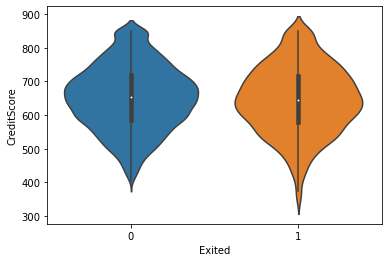

In [9]:
sns.violinplot(x=df['Exited'], y=df['CreditScore'])

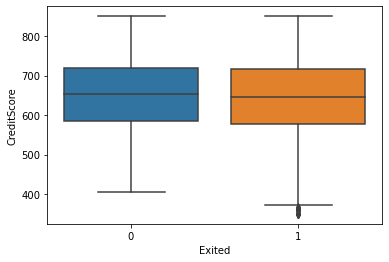

In [10]:
sns.boxplot(x=df['Exited'], y=df['CreditScore'])

CreditScore is lessthen 400 then high chance that account will closed.

**2. Geography**

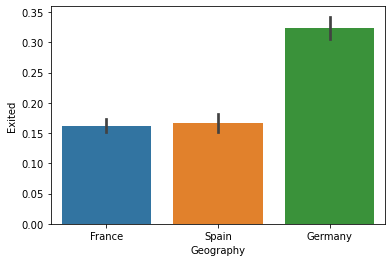

In [11]:
sns.barplot(x=df['Geography'], y=df['Exited'])

German person have almost double probablity of close account compare to other.

**3. Gender**

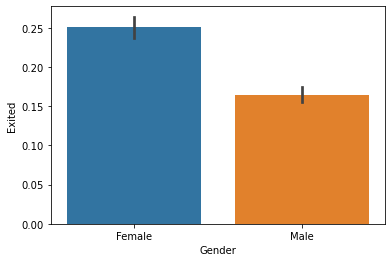

In [12]:
sns.barplot(x=df['Gender'], y=df['Exited'])

female close more account compare to male.

**4. Age**

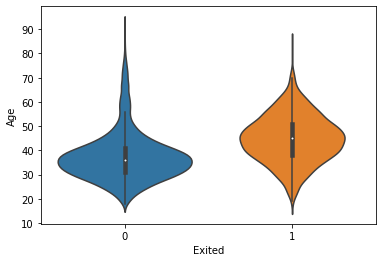

In [13]:
sns.violinplot(x=df['Exited'], y=df['Age'])

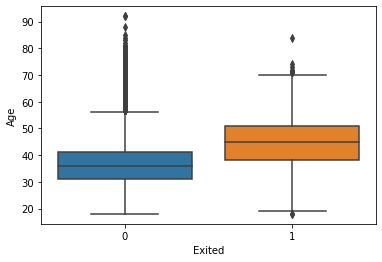

In [14]:
sns.boxplot(x=df['Exited'], y=df['Age'])

age is between 30 to 40 then less chance of close account but age between 41 to 50 then more chance of close account.

**5. Tenure**

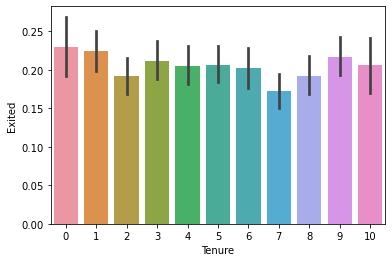

In [15]:
sns.barplot(x=df['Tenure'], y=df['Exited'])

**6. Balance**

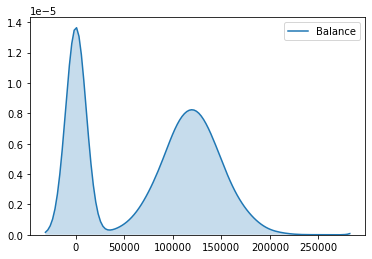

In [16]:
sns.kdeplot(data=df['Balance'],shade=True)

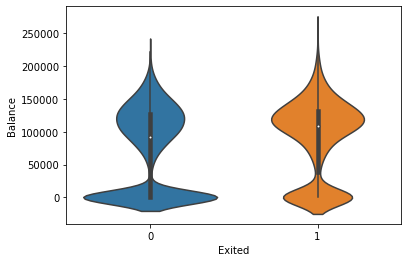

In [17]:
sns.violinplot(x='Exited', y='Balance', data=df)

if balance is between 90000 to 150000 then it is more chance the account is close but balance is 0 then less chance for close account.

**7. NumOfProducts**

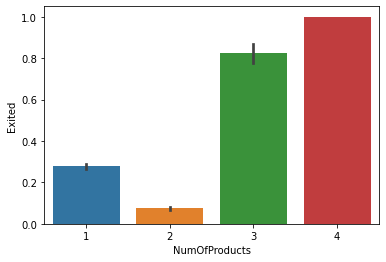

In [18]:
sns.barplot(x=df['NumOfProducts'], y=df['Exited'])

customer utilize more then 2 bank products then there are higher chance that customer close account.

**8. HasCrCard**

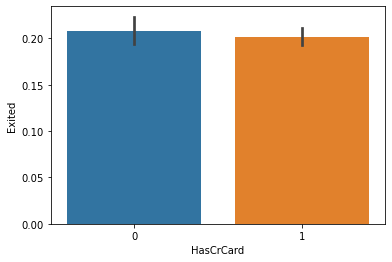

In [19]:
sns.barplot(x='HasCrCard', y='Exited', data=df)

we don't show any mejor diffrence who have cradit card or not.

**9. IsActiveMember**

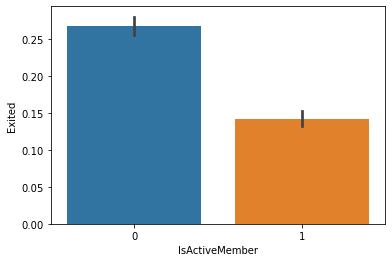

In [20]:
sns.barplot(x = df['IsActiveMember'], y= df['Exited'])

here higher chance of close account who is not active member.

**10. EstimatedSalary**

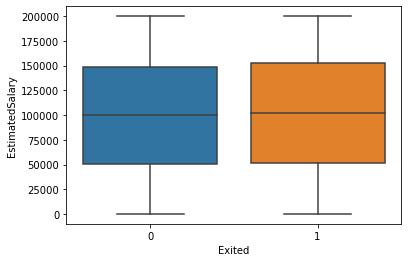

In [21]:
sns.boxplot(x=df['Exited'], y=df['EstimatedSalary'])

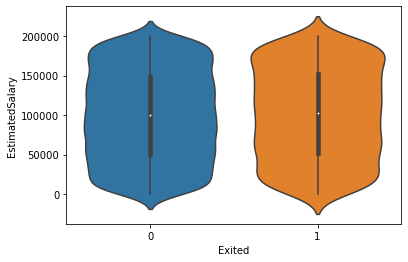

In [22]:
sns.violinplot(x=df['Exited'], y=df['EstimatedSalary'])

we don't get any usefull information from EstimatedSalary column.

# 3. Data Preprocesing

In [23]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**convert catagorical value in numeric value**

In [24]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [25]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Here RowNumber, CustomerId and Surname is not use in churn modeling

In [26]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [28]:
df.shape

(10000, 12)

here we have 12 columns and we find correlation between them. Threshold = 0.85 

In [29]:
def person_corr(df):
    df_dup = df.copy()
    df_corr = df.corr() # Find Correlation of dataframe
    col_name = df_corr.columns
    col = list()
    for i in df_corr:
        for j in col_name:
            if (df_corr[i][j]>0.0) & (i!=j) & (i not in col): # set threshold 0.85
                col.append(j)
    df_dup.drop(columns=col,inplace=True)
    return df_dup

In [30]:
df_diff_col = person_corr(df)

here we don't have correlated columns.

In [31]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


# 4. Train Model

In [32]:
X_train = df.drop(columns=['Exited'])
y_train = df['Exited']


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold


In [35]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

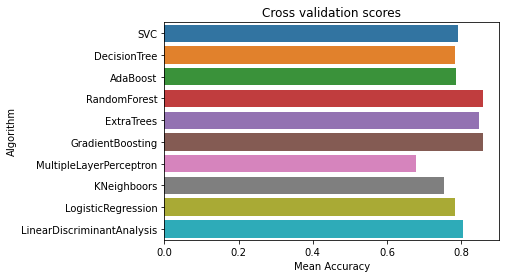

In [36]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


Here RandomForest, ExtraTrees, GradientBoosting have high score so we use that classifier

In [37]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {
#               "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[50,100,200,300],
              "criterion": ["gini"]}
etc_folds = []
etcc = []
for i in range(5,18,2):

    kfold =i
    gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

    gsExtC.fit(X_train,y_train)

    ExtC_best = gsExtC.best_estimator_
    etc_folds.append(gsExtC.best_score_)
    etcc.append(ExtC_best)
# Best score
gsExtC.best_score_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.0min finished


Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  1.5min finished


Fitting 9 folds for each of 36 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.9min finished


Fitting 11 folds for each of 36 candidates, totalling 396 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.7s
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed:  2.4min finished


Fitting 13 folds for each of 36 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:  2.9min finished


Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.5min finished


Fitting 17 folds for each of 36 candidates, totalling 612 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 612 out of 612 | elapsed:  3.9min finished


0.8558571327333285

In [38]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {
#               "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[50,100,200,300],
              "criterion": ["gini"]}

rfc_folds =[]
rfcc = []
for i in range(5,18,2):
    kfold = i

    gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

    gsRFC.fit(X_train,y_train)

    RFC_best = gsRFC.best_estimator_
    
    rfc_folds.append(gsRFC.best_score_)
    rfcc.append(RFC_best)
# Best score
gsRFC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.1min finished


Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  3.4min finished


Fitting 9 folds for each of 36 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  4.2min finished


Fitting 11 folds for each of 36 candidates, totalling 396 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed:  5.2min finished


Fitting 13 folds for each of 36 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:  6.2min finished


Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  7.3min finished


Fitting 17 folds for each of 36 candidates, totalling 612 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 612 out of 612 | elapsed:  8.4min finished


0.8645692207858979

In [39]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [50,100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,10],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gbdt_folds = []
gbdtt = []
for i in range(3,10,2):
    kfold = i
    gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

    gsGBC.fit(X_train,y_train)

    GBC_best = gsGBC.best_estimator_
    
    gbdt_folds.append(gsGBC.best_score_)
    gbdtt.append(GBC_best)
# Best score
gsGBC.best_score_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  2.6min finished


Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:  5.1min finished


Fitting 7 folds for each of 160 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:  7.6min finished


Fitting 9 folds for each of 160 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed: 10.2min finished


0.8622846129272865

In [40]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

In [41]:
votingC = VotingClassifier(estimators=[('etc', etcc[etc_folds.index(max(etc_folds))]),('rfc', rfcc[rfc_folds.index(max(rfc_folds))]), ('gbdt',gbdtt[gbdt_folds.index(max(gbdt_folds))])], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

exited_pred = pd.Series(votingC.predict(X_test), name="Exited_pred")

y_test.reset_index(drop=True, inplace=True)

results = pd.concat([y_test, exited_pred],axis=1)

results.to_csv("churn_modling.csv",index=False)